In [1]:
import pandas as pd

from src.linreg import LinearRegression

In [2]:
# read data from csv
df = pd.read_csv('../data/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [3]:
# check for missing values
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [4]:
# fill missing values with mean value
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].mean())

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

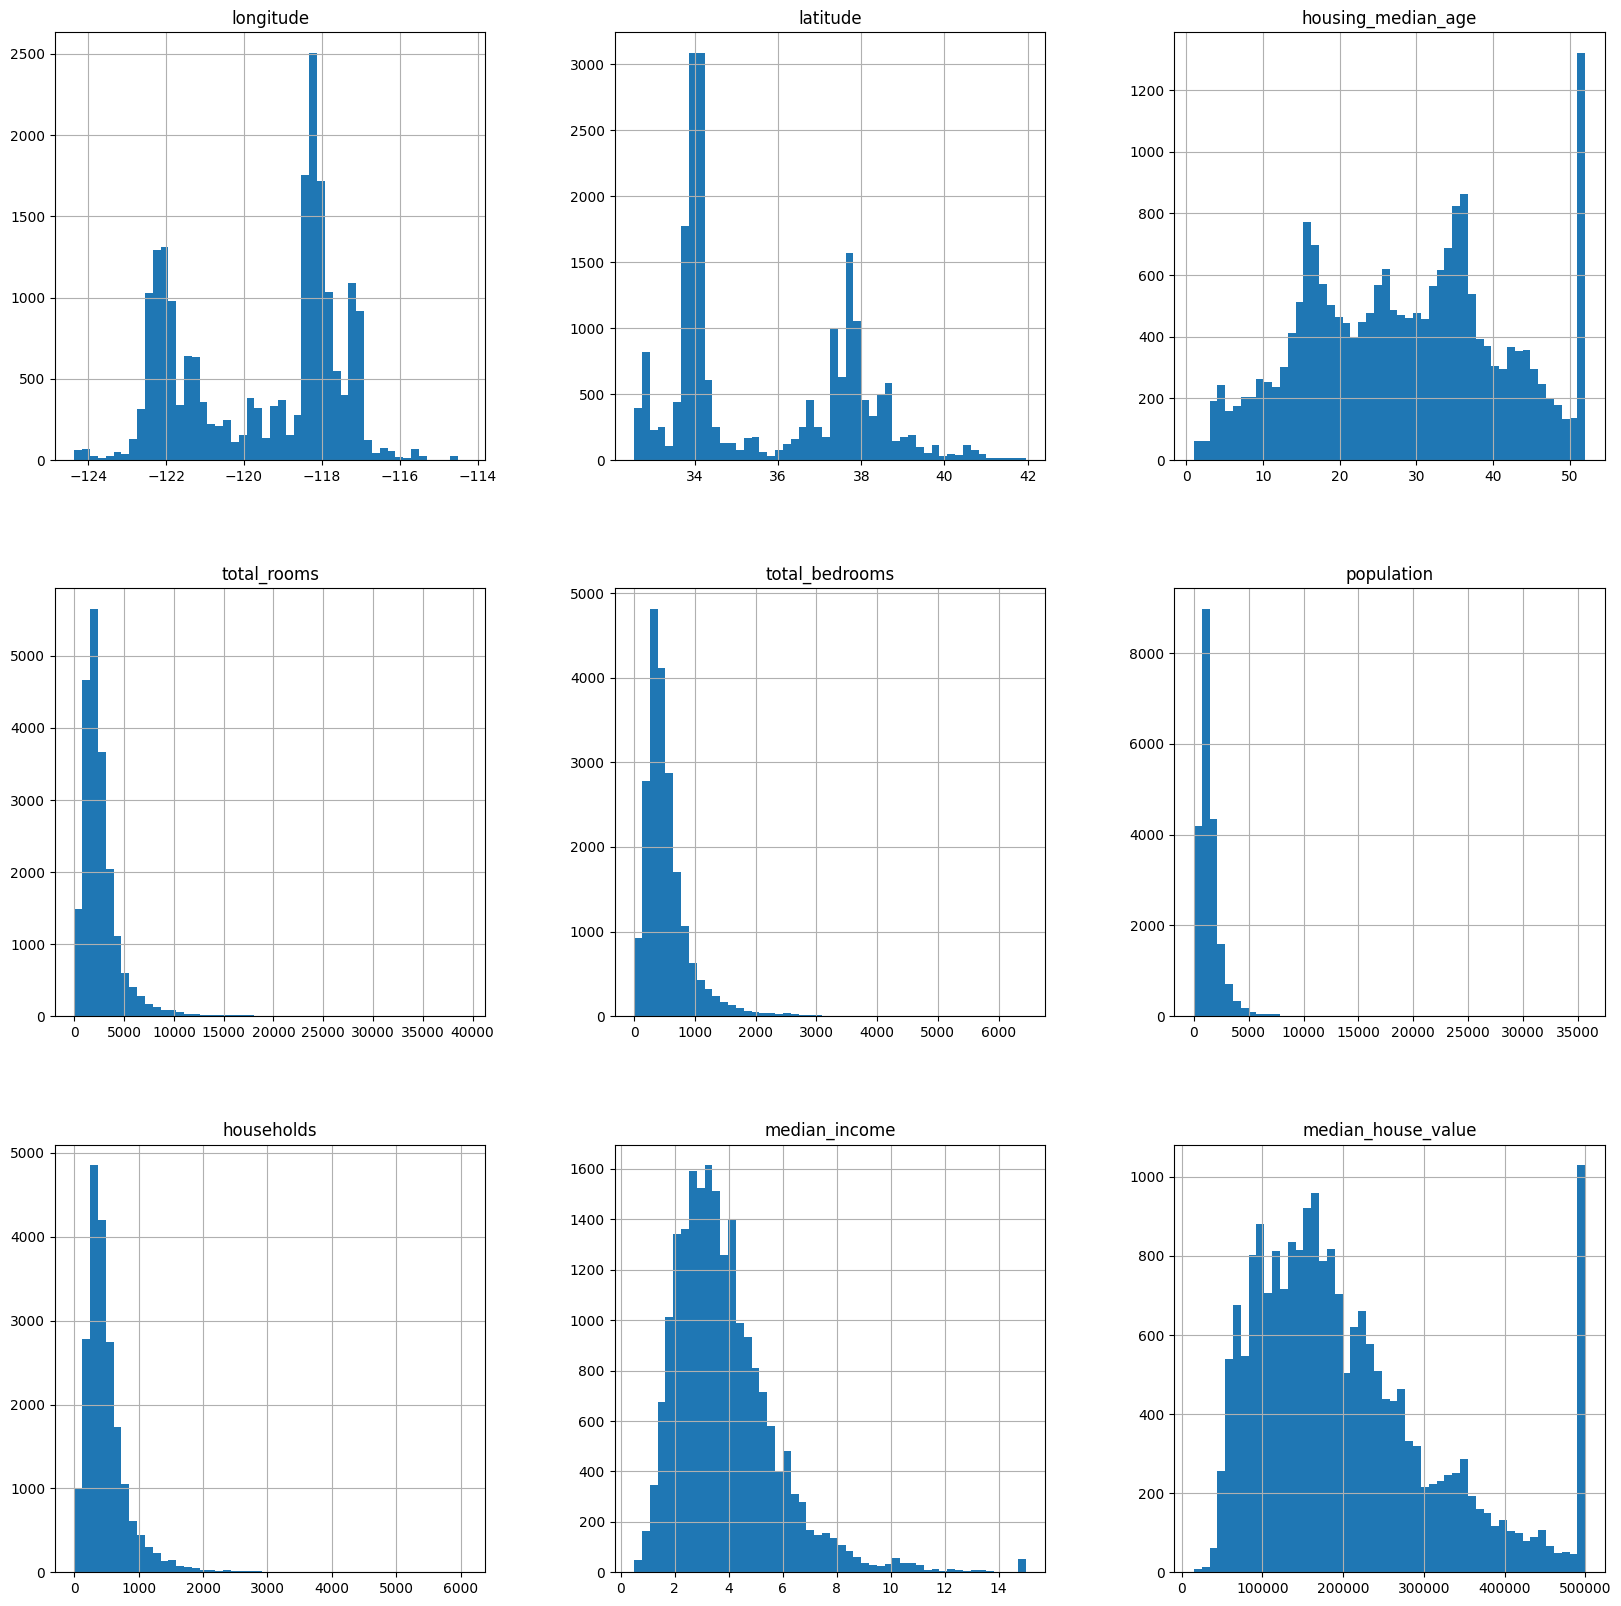

In [5]:
df.hist(bins=50, figsize=(20, 20))

In [6]:
# transform categorical data to numerical
proximity_numerical: pd.DataFrame = pd.DataFrame(data=0, index=df.index, columns=df['ocean_proximity'].unique())

for proximity in proximity_numerical.columns:
    proximity_numerical[proximity] = (df['ocean_proximity'] == proximity).astype(int)
    
df = pd.concat([df, proximity_numerical], axis=1).drop(columns=['ocean_proximity'])

In [7]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069260,0.099773,0.055310,-0.015176,-0.045967,-0.474489,0.321121,-0.055575,0.045509,0.009446
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066658,-0.108785,-0.071035,-0.079809,-0.144160,0.358771,-0.446969,0.351166,-0.160818,-0.016572
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,0.105623,0.255172,0.045300,-0.236645,0.021622,0.017020
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,0.134153,-0.023022,-0.003031,0.025624,-0.009175,-0.007572
total_bedrooms,0.069260,-0.066658,-0.318998,0.927253,1.000000,0.873910,0.974725,-0.007682,0.049454,-0.019785,0.018220,-0.006433,0.000676,-0.004361
population,0.099773,-0.108785,-0.296244,0.857126,0.873910,1.000000,0.907222,0.004834,-0.024650,-0.060880,0.074613,-0.020732,-0.024264,-0.010412
households,0.055310,-0.071035,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,0.065843,-0.010093,0.042435,-0.039402,0.001714,-0.009077
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,0.688075,0.056197,0.168876,-0.237496,0.027344,-0.009228
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049454,-0.024650,0.065843,0.688075,1.000000,0.160284,0.256617,-0.484859,0.141862,0.023416
NEAR BAY,-0.474489,0.358771,0.255172,-0.023022,-0.019785,-0.060880,-0.010093,0.056197,0.160284,1.000000,-0.314813,-0.240887,-0.135818,-0.005499


In [8]:
# shuffle data and split into 80% training dataset and 20% test dataset
seed = 14
df_shuffled = df.sample(frac=1, random_state=14).reset_index(drop=True)
df_training, df_test = df_shuffled[:int(df.shape[0]*0.8)], df_shuffled[int(df.shape[0]*0.8):]
X_train, y_train = df_training.drop(columns=['median_house_value']), df_training['median_house_value'] 
X_test, y_test = df_test.drop(columns=['median_house_value']), df_test['median_house_value'] 

In [9]:
X_train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.564668,35.630184,28.634872,2618.599201,535.221524,1419.375121,497.322008,3.873247,0.111313,0.442406,0.318011,0.128089,0.000182
std,2.006186,2.137251,12.542966,2175.644998,420.576130,1141.589379,383.850585,1.903890,0.314529,0.496687,0.465718,0.334199,0.013478
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.790000,33.930000,18.000000,1442.000000,295.000000,785.000000,279.000000,2.572850,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.250000,29.000000,2123.000000,436.000000,1163.000000,408.000000,3.533400,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.710000,37.000000,3129.250000,640.000000,1715.250000,602.000000,4.740400,0.000000,1.000000,1.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
# standardize feature values
X_scaled = X_train.drop(columns=proximity_numerical.columns)

for feature in X_scaled.columns:
    X_scaled[feature] = (X_scaled[feature] - X_scaled[feature].min()) / (X_scaled[feature].max() - X_scaled[feature].min())
    
X_scaled.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,0.708167,0.072264,0.372549,0.049850,0.051676,0.032792,0.057227,0.250459
1,0.240040,0.501594,0.823529,0.053462,0.060056,0.031783,0.066108,0.305079
2,0.296813,0.624867,0.333333,0.067170,0.077747,0.049105,0.088801,0.195046
3,0.289841,0.631243,0.215686,0.125312,0.156580,0.073376,0.142904,0.153536
4,0.221116,0.470776,0.509804,0.025154,0.029950,0.015135,0.025325,0.290955


In [11]:
# standardize target values
y_scaled = (y_train - y_train.min()) / (y_train.max() - y_train.min())
y_scaled.head()

0    0.304125
1    0.459794
2    0.157115
3    0.195465
4    0.690721
Name: median_house_value, dtype: float64

In [12]:
# initialize linear regression model
model = LinearRegression(epochs=5000, lr=0.01, metrics=['mse', 'rmse', 'r2'], reg='l1', l1_coef=0.01, sgd_sample=0.5)

In [13]:
loss, weights = model.fit(X_scaled, y_scaled, verbose=100)

start | loss: 5.798903891106254 | mse: 5.329176172305227 | rmse: 2.3085008495353057 | r2: -93.35625254406649
100 | loss: 0.11785840380360799 | mse: 0.06269581348397302 | rmse: 0.25039132070415904 | r2: -0.11006688825422928
200 | loss: 0.10998577609733298 | mse: 0.057362795335879006 | rmse: 0.23950531379466095 | r2: -0.015642611230191728
300 | loss: 0.10324559737152121 | mse: 0.05310612357791191 | rmse: 0.23044765908533746 | r2: 0.0597243089852082
400 | loss: 0.09729444995681412 | mse: 0.04958854544834192 | rmse: 0.22268485680068575 | r2: 0.12200513431465498
500 | loss: 0.09192218003180903 | mse: 0.0466053493483032 | rmse: 0.2158827212824204 | r2: 0.17482440609376115
600 | loss: 0.087002934472789 | mse: 0.044029686897084905 | rmse: 0.20983252106640882 | r2: 0.22042805079562067
700 | loss: 0.08245256658368785 | mse: 0.04177858612370284 | rmse: 0.204398106947454 | r2: 0.2602851368081295
800 | loss: 0.07821211051120922 | mse: 0.03979508452662194 | rmse: 0.19948705353135562 | r2: 0.29540421